### 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [1]:
# 1) 데이터 가져오기

import pandas as pd

data = pd.read_csv('./train.csv')

In [2]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.shape

(10886, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# 2) datetime 칼럼을 datetime 자료형으로 변환하고 연,월,일,시,분,초 6가지 컬럼 생성하기

data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')

data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

In [6]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


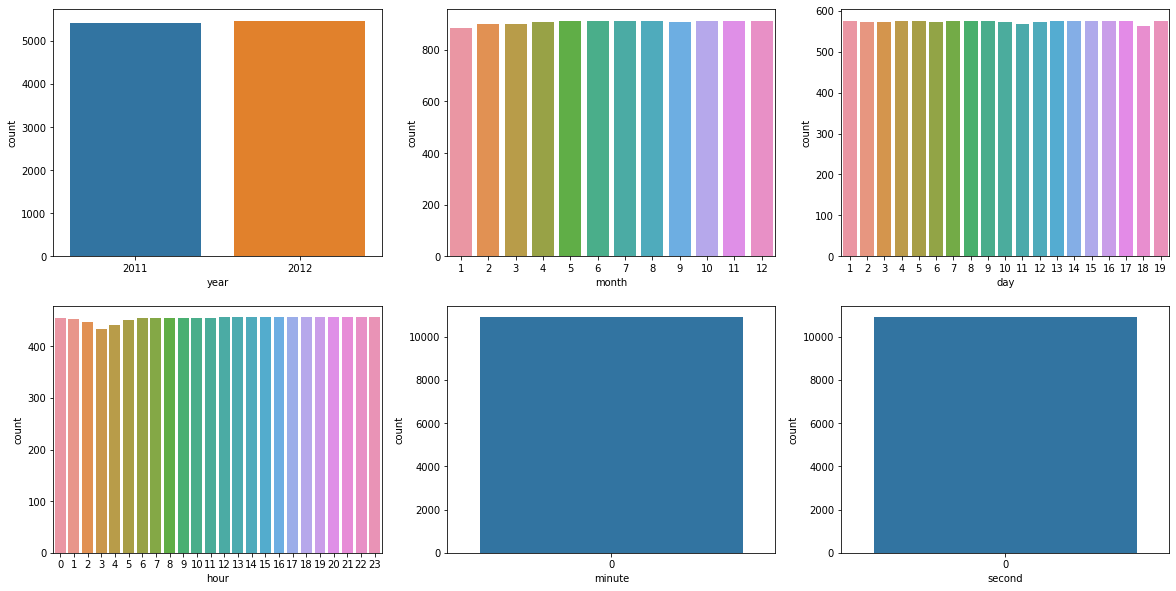

In [7]:
# 3) Year, month, day, hour, minute, second 데이터 개수 시각화 하기

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.countplot(data= data, x='year')

plt.subplot(2,3,2)
sns.countplot(data= data, x='month')

plt.subplot(2,3,3)
sns.countplot(data= data, x='day')

plt.subplot(2,3,4)
sns.countplot(data= data, x='hour')

plt.subplot(2,3,5)
sns.countplot(data= data, x='minute')

plt.subplot(2,3,6)
sns.countplot(data= data, x='second')

plt.show()

In [8]:
# 4) X,y 컬럼 선택 및 train/test 데이터셋 분리

from sklearn.model_selection import train_test_split

features =['temp','atemp','humidity','windspeed','workingday','holiday']

X = data[features]
y = data['count']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(f'{X_train.shape}, {y_train.shape}')
print(f'{X_test.shape}, {y_test.shape}')

(8708, 6), (8708,)
(2178, 6), (2178,)


In [9]:
# 5) LinearRegression 모델 학습

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [10]:
# 6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수 값 계산

pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mse_error = mean_squared_error(pred, y_test)

print(f'mse loss = {mse_error}')
print(f'rmse loss = {mse_error ** 0.5}')

mse loss = 24456.172474180326
rmse loss = 156.38469386158073


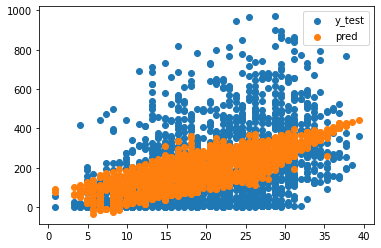

In [13]:
# 7) x축은 temp 또는 humidity로, y축은 count로 예측결과 시각화 하기

plt.scatter(X_test['temp'], y_test, label='y_test')
plt.scatter(X_test['temp'], pred, label='pred')
plt.legend()
plt.show()

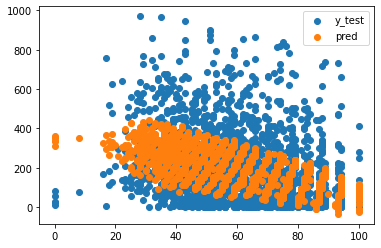

In [15]:
plt.scatter(X_test['humidity'], y_test, label='y_test')
plt.scatter(X_test['humidity'], pred, label='pred')
plt.legend()
plt.show()